# HW3 - Basic Data Processing for Data Visualization

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2023
#### Due : 4/12 (wed)  23:59 PM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [folium](https://python-visualization.github.io/folium/quickstart.html#Getting-Started) and [plotly](https://plotly.com/python/plotly-express/#plotly-express) for plotting,visualizing
         
------------------------------------------

### CHECK YOUR PYTHON and PACKAGE VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [56]:
import sys
sys.version

'3.9.6 (default, Mar 10 2023, 20:16:38) \n[Clang 14.0.3 (clang-1403.0.22.14.1)]'

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [57]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

## Problem1. Data Processing

### Problem 1-1 Load dataframe(Python data structure) using pandas library


#### Use Pandas library


In [58]:
###YOUR CODE HERE###
covid = pd.read_csv("data/covid_train4.csv")
meta = pd.read_csv("data/metadata.csv")
policy = pd.read_csv("data/OxCGRT_latest.csv")

# this will let you read data from file name ~~ , 

In [59]:
# You can check whether data is correctly loaded in your df
print(covid.shape)
print('\n')
print(covid.head())
print('\n')
print(covid.tail())
print('\n')
print('-'*100)

print(meta.shape)
print('\n')
print(meta.head())
print('\n')
print(meta.tail())
print('\n')
print('-'*100)

print(policy.shape)
print('\n')
print(policy.head())
print('\n')
print(policy.tail())
print('\n')



(35995, 6)


   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0


          Id Province_State Country_Region        Date  ConfirmedCases  \
35990  35991            NaN       Zimbabwe  2020-05-11            36.0   
35991  35992            NaN       Zimbabwe  2020-05-12            36.0   
35992  35993            NaN       Zimbabwe  2020-05-13            37.0   
35993  35994            NaN       Zimbabwe  2020-05-14            37.0   
35994  35995            NaN       Zimbabwe  2020-05-15            42.0   

       Fatalities  
35990         4.0  
35991         4.0  
35992         4.0  
3599

In [60]:
policy['StringencyIndex'].isnull().sum()

1318

### Problem 1-2 Data Cleaning
1. Drop 'Id' column in covid dataset 
2. Drop  column except 'CountryName','Date','C\*_policy' (C1_\**, C2_\**,..C8_\**),'ConfirmedCases', 'ConfirmedDeaths','StringencyIndex'
3. Modify Nan data in 'province_state' column of covid and meta dataset to blank and 
4. Check if there are null/na datas in column of 'ConfirmedCases'. 'ConfirmedDeaths','StringencyIndex' coulumn using metadataset
5. if there are null/na dataset in 4. Count how many null/na datas in each column and Change null/na datas to 0
<br><b>Hint, first check the number and name of data columns and you can use data indexing</b>

In [61]:
###YOUR CODE HERE###
covid2 = covid.drop(labels = ["Id"], axis = 1)
covid2['Province_State'] = covid2.Province_State.fillna('')
covid2

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,,Afghanistan,2020-01-22,0.0,0.0
1,,Afghanistan,2020-01-23,0.0,0.0
2,,Afghanistan,2020-01-24,0.0,0.0
3,,Afghanistan,2020-01-25,0.0,0.0
4,,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...
35990,,Zimbabwe,2020-05-11,36.0,4.0
35991,,Zimbabwe,2020-05-12,36.0,4.0
35992,,Zimbabwe,2020-05-13,37.0,4.0
35993,,Zimbabwe,2020-05-14,37.0,4.0


In [62]:
###YOUR CODE HERE###
policy2 = policy.drop(labels = ["CountryCode", "E1_Income support", "E1_Flag" , "E2_Debt/contract relief", "E3_Fiscal measures", "E4_International support", "H1_Public information campaigns","H1_Flag","H2_Testing policy","H3_Contact tracing","H4_Emergency investment in healthcare","H5_Investment in vaccines","M1_Wildcard", "StringencyIndexForDisplay","LegacyStringencyIndex","LegacyStringencyIndexForDisplay"
], axis = 1)
policy2


,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Aruba,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
1,Aruba,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
2,Aruba,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
3,Aruba,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
4,Aruba,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,Kosovo,20200509,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,862.0,28.0,94.71
22178,Kosovo,20200510,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,870.0,28.0,94.71
22179,Kosovo,20200511,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,884.0,28.0,94.71
22180,Kosovo,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.0,29.0,NaN


In [63]:
###YOUR CODE HERE###
meta['Province_State'] = meta.Province_State.fillna('')
meta

,Country_Region,Province_State,lat,lon,continent,population,area,density
0,Afghanistan,,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...
315,West Bank and Gaza,,31.6000,34.8000,Asia,5190143,6020,862.15
316,Western Sahara,,24.2155,-12.8858,Africa,567402,266000,2.13
317,Yemen,,15.5527,48.5164,Asia,28498683,527968,53.98
318,Zambia,,-15.4167,28.2833,Africa,17861030,752612,23.73


In [64]:
###YOUR CODE HERE###

# print how many null/na values in 'ConfirmedCases' column
print(policy2['ConfirmedCases'].isnull().sum())

# print how many null/na values in ''ConfirmedDeaths' column
print(policy2['ConfirmedDeaths'].isnull().sum())

# print how many null/na values in ''StringencyIndex' column
print(policy2['StringencyIndex'].isnull().sum())

8023
8023
1318


In [65]:
###YOUR CODE HERE###
policy2[['ConfirmedCases','ConfirmedDeaths','StringencyIndex']] = policy2[['ConfirmedCases','ConfirmedDeaths','StringencyIndex']].fillna(0)
policy2
# Change null/na value to 0

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Aruba,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00
1,Aruba,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00
2,Aruba,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00
3,Aruba,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00
4,Aruba,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,Kosovo,20200509,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,862.0,28.0,94.71
22178,Kosovo,20200510,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,870.0,28.0,94.71
22179,Kosovo,20200511,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,884.0,28.0,94.71
22180,Kosovo,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.0,29.0,0.00


In [66]:
###YOUR CODE HERE###

#check if null/na value change to 0 or not
# print how many null/na values in 'ConfirmedCases' column
print(policy2['ConfirmedCases'].isnull().sum())

# print how many null/na values in ''ConfirmedDeaths' column
print(policy2['ConfirmedDeaths'].isnull().sum())

# print how many null/na values in ''StringencyIndex' column
print(policy2['StringencyIndex'].isnull().sum())

0
0
0


### Problem 1-3 Data  Filtering
### 1. Filter rows with the most recent day of in the column 'Date' in covid data set
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__
- __Condition 1 : Check when the 'Date' columns starts and ends using python function using  <u>covid2 dataset<u>__
- __Condition 2 : Filtering rows with the most recent day using  <u>covid2 dataset<u>__
- __Condition 3 : Filtering rows with six unique countries by "CountryName' using <u>policy2 dataset<u>__
    
    ('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)

In [67]:
###YOUR CODE HERE###

#Condition 1
covid2['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [68]:
###YOUR CODE HERE###
covid3 = covid2[covid2['Date']=='2020-05-15']
#Condition 2
covid3

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
114,,Afghanistan,2020-05-15,6053.0,153.0
229,,Albania,2020-05-15,916.0,31.0
344,,Algeria,2020-05-15,6629.0,536.0
459,,Andorra,2020-05-15,761.0,49.0
574,,Angola,2020-05-15,48.0,2.0
...,...,...,...,...,...
35534,,Vietnam,2020-05-15,314.0,0.0
35649,,West Bank and Gaza,2020-05-15,375.0,2.0
35764,,Western Sahara,2020-05-15,6.0,0.0
35879,,Zambia,2020-05-15,654.0,7.0


In [69]:
###YOUR CODE HERE###
policy3 = policy2[policy2['CountryName'].isin(['Australia','China','Japan','New Zealand','Singapore','South Korea'])]
#Condition 3
policy3


,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22460.0,20.0,0.0
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23336.0,20.0,0.0
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23787.0,21.0,0.0
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24671.0,21.0,0.0


### Problem 1-4 Data  Grouping
- __Hint, If you are not familiar with data grouping using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-groupby/__
### Grouping using Countrty_Region and calculate sum of each Column

In [70]:
###YOUR CODE HERE###
covid4 = covid3.groupby(by=['Country_Region']).sum(numeric_only=True)
covid4

,ConfirmedCases,Fatalities
Country_Region,,
Afghanistan,6053.0,153.0
Albania,916.0,31.0
Algeria,6629.0,536.0
Andorra,761.0,49.0
Angola,48.0,2.0
...,...,...
Vietnam,314.0,0.0
West Bank and Gaza,375.0,2.0
Western Sahara,6.0,0.0


### Problem 1-5 Data Merging

### Join the table from covid4 dataset with the metadata table
- __Condition 1 : Check the difference between both datasets__
- __Condition 2 : in the meta dataset due to Province_State, there are many same Country_Region. We use only dataset which not contain province_State data__

In [71]:
###YOUR CODE HERE###
meta_count = set(meta['Country_Region'].values.tolist())
#Condition 1
covid_count = set(covid4.index.tolist())

print((meta_count - covid_count))
print((covid_count - meta_count)) #This output is Hint of this problem

{'Yemen', 'Comoros', 'Tajikistan'}
set()


In [72]:
meta

,Country_Region,Province_State,lat,lon,continent,population,area,density
0,Afghanistan,,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...
315,West Bank and Gaza,,31.6000,34.8000,Asia,5190143,6020,862.15
316,Western Sahara,,24.2155,-12.8858,Africa,567402,266000,2.13
317,Yemen,,15.5527,48.5164,Asia,28498683,527968,53.98
318,Zambia,,-15.4167,28.2833,Africa,17861030,752612,23.73


In [73]:
###YOUR CODE HERE###
right_table = meta[meta['Province_State'] == ''].drop(labels = ['Province_State'], axis=1)
#condition 2
right_table


,Country_Region,lat,lon,continent,population,area,density
0,Afghanistan,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...
315,West Bank and Gaza,31.6000,34.8000,Asia,5190143,6020,862.15
316,Western Sahara,24.2155,-12.8858,Africa,567402,266000,2.13
317,Yemen,15.5527,48.5164,Asia,28498683,527968,53.98
318,Zambia,-15.4167,28.2833,Africa,17861030,752612,23.73


In [74]:
###YOUR CODE HERE###
covid_notlong = pd.merge(covid4, right_table, on='Country_Region')

#reset index to row number
covid_notlong

,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
0,Afghanistan,6053.0,153.0,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,916.0,31.0,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,6629.0,536.0,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,761.0,49.0,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,48.0,2.0,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...,...
179,Vietnam,314.0,0.0,16.0000,108.0000,Asia,96462106,331212,291.24
180,West Bank and Gaza,375.0,2.0,31.6000,34.8000,Asia,5190143,6020,862.15
181,Western Sahara,6.0,0.0,24.2155,-12.8858,Africa,567402,266000,2.13
182,Zambia,654.0,7.0,-15.4167,28.2833,Africa,17861030,752612,23.73


# Problem2 Data Visualizing
### visualizing your dataset created in Problem 1

## Problem2-1  plot barchart of  top10 'ConfirmedCases' and 'Fatalities' in covid_notlong dataset 

In [75]:
###YOUR CODE HERE###
top10 = covid_notlong.sort_values(by = ['ConfirmedCases'], ascending=False).head(10)
#Extract and save top10 data according to the number of ConfirmedCases
top10

,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
171,US,1442653.0,87525.0,37.0902,-95.7129,Americas,328239523,3796742,86.45
138,Russia,262843.0,2418.0,60.0000,90.0000,Europe,145872256,17098246,8.53
175,United Kingdom,238004.0,34078.0,55.3781,-3.4360,Europe,67530172,242495,278.48
156,Spain,230183.0,27459.0,40.0000,-4.0000,Europe,46736776,505992,92.37
84,Italy,223885.0,31610.0,43.0000,12.0000,Europe,60550075,301339,200.94
23,Brazil,220291.0,14962.0,-14.2350,-51.9253,Americas,211049527,8515767,24.78
61,France,179630.0,27532.0,46.2276,2.2137,Europe,65129728,640679,101.66
65,Germany,175233.0,7897.0,51.0000,9.0000,Europe,83517045,357114,233.87
170,Turkey,146457.0,4055.0,38.9637,35.2433,Asia,83429615,783562,106.47
80,Iran,116635.0,6902.0,32.0000,53.0000,Asia,82913906,1648195,50.31


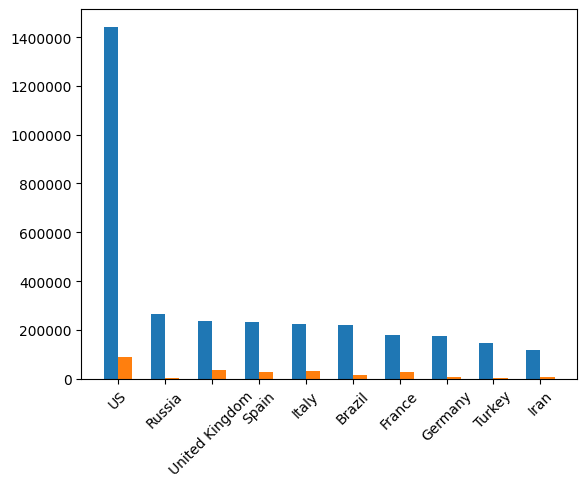

In [76]:
###YOUR CODE HERE###
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = top10['ConfirmedCases'].values.tolist()
value_b_x = top10['Fatalities'].values.tolist()
ax = plt.gca()

middle_x = top10['Country_Region'].values.tolist()
plt.bar(np.arange(10)-0.15, value_a_x, width=0.3)
plt.bar(np.arange(10)+0.15, value_b_x, width=0.3)
plt.xticks(np.arange(10), middle_x, rotation=45)

ylist = create_x(200000, 1, 0, 8)
plt.yticks(np.arange(0, 1600000, 200000), ylist)
plt.show()

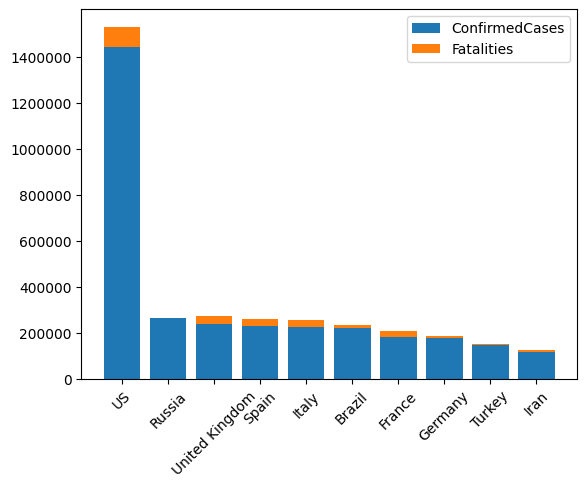

In [77]:
###YOUR CODE HERE###
ax = plt.gca()
plt.bar(np.arange(10), value_a_x, label = 'ConfirmedCases')
plt.bar(np.arange(10), value_b_x, bottom=value_a_x, label = 'Fatalities')
plt.xticks(np.arange(10), middle_x, rotation=45)
plt.yticks(np.arange(0, 1600000, 200000), ylist)
plt.legend()
plt.show()


## Problem2-2  visualizing your data to express 'corona infection situation globally'
### if you are not familiar with folium package, refer to the website written at the beginning of the document.

In [78]:
###YOUR CODE HERE###
m = folium.Map()

#covid_notlong 자료를 이용
for i in range(len(covid_notlong)):
    folium.CircleMarker(
        location = [covid_notlong.loc[i, 'lat'], covid_notlong.loc[i, 'lon']],
        radius = covid_notlong.loc[i, 'ConfirmedCases'] / 30000,
        color = 'Crimson',
        fill = True,
        tooltip = 
            "• Continent : " + str(covid_notlong.loc[i, "continent"]) + "<br/>" + 
            "• Country : " + str(covid_notlong.loc[i, "Country_Region"]) + "<br/>" +
            "• Confirmed : " + str(covid_notlong.loc[i, "ConfirmedCases"]) + "<br/>" +
            "• Deaths : " + str(covid_notlong.loc[i, "Fatalities"])
    ).add_to(m)

m

## Problem2-3  visualizing your data(covid_for_visualize.csv) to express 'corona infection situation ' according to date
### if you are not familiar with cufflinks package, refer to the website written at the beginning of the document.

In [79]:
import cufflinks as cf
cf.go_offline(connected=True)

In [80]:
data = pd.read_csv('data/covid_for_visualize.csv')

In [81]:
data

,Date,Australia,China,Japan,NewZealand,Singapore,SouthKorea
0,20200101,0.0,27.0,0.0,0.0,0.0,0.0
1,20200102,0.0,27.0,0.0,0.0,0.0,0.0
2,20200103,0.0,44.0,0.0,0.0,0.0,0.0
3,20200104,0.0,44.0,0.0,0.0,0.0,0.0
4,20200105,0.0,59.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
130,20200510,6929.0,83991.0,15747.0,1144.0,22460.0,10874.0
131,20200511,6941.0,84010.0,15798.0,1147.0,23336.0,10909.0
132,20200512,6948.0,84011.0,15874.0,1147.0,23787.0,10936.0
133,20200513,6964.0,84018.0,16024.0,1147.0,24671.0,10962.0


In [82]:
###YOUR CODE HERE###
data.iplot(kind = 'scatter', x = 'Date', subplots = False, vline = [20200213, 20200313, 20200413])
# 수직선: 2/13, 3/13, 4/13
# fig = px.line(data, x = 'Date', y = data.columns.tolist())
# fig.show()

In [83]:
###YOUR CODE HERE###
data.iplot(kind = 'scatter', x = 'Date', subplots = True, shape=(6,1), dimensions=(1200, 800), fill=True)

In [84]:
###YOUR CODE HERE###
# fig = 
# fig.show()
data.iplot(kind = 'scatter', x = 'Date', subplots = True, subplot_titles = True, shape=(3,2))

In [85]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

## Problem2-4  visualizing your data to express 'corona infection situation ' according to other factor.
### if you are not familiar with plotly package, refer to the website written at the beginning of the document.

In [86]:
###YOUR CODE HERE###
fig = px.scatter(covid_notlong, x="population", y="ConfirmedCases", size="density", color="continent", log_x = True, log_y = True, hover_name="Country_Region", size_max=60)
fig.show()